In [1]:
from utils.funcoes import merge_tabelas
from classes.classdatabasemanager import DatabaseManager

db_manager= DatabaseManager()

df_merged = merge_tabelas(db_manager)

# Selecionar apenas as colunas necessárias
df_atendentes_vendas = df_merged[["Atendente", "ID Atendente", "Quantidade", "Receita Total", "Loja"]]

display(df_atendentes_vendas.head())

,Atendente,ID Atendente,Quantidade,Receita Total,Loja
0,Allison Smith,33,5,4745.90,"Robles, Weber and Garcia"
1,Angela Willis,28,3,1361.82,Palmer-Hill
2,John Beck,11,10,8309.00,Curry-Massey
3,Patricia Cox,9,7,6704.74,"Waller, Sullivan and Boyd"
4,Kathryn Matthews,41,1,616.41,Miranda Ltd


In [2]:
#Atendentes que mais venderam (quantidade total de produtos vendidos)

atendentes_mais_vendas = df_atendentes_vendas.groupby("Atendente")["Quantidade"].sum().sort_values(ascending=False).reset_index()
atendentes_mais_vendas.head(10)


,Atendente,Quantidade
0,Jenny Ellis,22
1,Jason Guerrero,18
2,John Beck,16
3,Holly Thornton,13
4,Peggy Bell,12
5,Patricia Cox,12
6,Mckenzie Moore MD,11
7,Jason Chandler,11
8,Keith Carlson,10
9,Perry Lewis,10


In [3]:
#Atendentes que mais faturaram (receita total)
atendentes_mais_receita = df_atendentes_vendas.groupby("Atendente")["Receita Total"].sum().sort_values(ascending=False).reset_index()
atendentes_mais_receita.head(10)


,Atendente,Receita Total
0,Jenny Ellis,12747.88
1,John Beck,11560.16
2,Patricia Cox,9322.44
3,Jason Guerrero,9157.53
4,Mary Robertson,8069.22
5,Peggy Bell,7629.64
6,Perry Lewis,7165.70
7,Mckenzie Moore MD,6848.16
8,Jason Chandler,5724.99
9,Sarah Wallace,5597.72


In [4]:
#Ticket médio por atendente (Receita Média por Venda)
df_ticket_medio = df_atendentes_vendas.groupby("Atendente").agg({"Receita Total": "sum", "Quantidade": "sum"})
df_ticket_medio["Ticket Médio"] = round(df_ticket_medio["Receita Total"] / df_ticket_medio["Quantidade"], 2)
df_ticket_medio = df_ticket_medio.sort_values(by="Ticket Médio", ascending=False).reset_index()
df_ticket_medio.head(10)


,Atendente,Receita Total,Quantidade,Ticket Médio
0,Allison Smith,4745.90,5,949.18
1,Deborah Griffin,5379.48,6,896.58
2,Mary Robertson,8069.22,9,896.58
3,Lauren Miller,4807.92,6,801.32
4,Sarah Wallace,5597.72,7,799.67
5,Mercedes Butler,3979.55,5,795.91
6,Patricia Cox,9322.44,12,776.87
7,Jeremiah Anderson,3063.95,4,765.99
8,John Beck,11560.16,16,722.51
9,Perry Lewis,7165.70,10,716.57


In [5]:
#Distribuição de atendentes por loja
atendentes_por_loja = df_atendentes_vendas.groupby("Loja")["Atendente"].nunique().reset_index()
atendentes_por_loja.rename(columns={"Atendente": "Número de Atendentes"}, inplace=True)
display(atendentes_por_loja)


,Loja,Número de Atendentes
0,Bennett Group,1
1,Brown-Miller,2
2,Burton-Banks,3
3,Castillo-Cameron,1
4,Cox-Benton,2
5,Curry-Massey,3
6,Dixon and Sons,1
7,Fitzgerald Group,1
8,Hansen LLC,2
9,Harris Inc,3


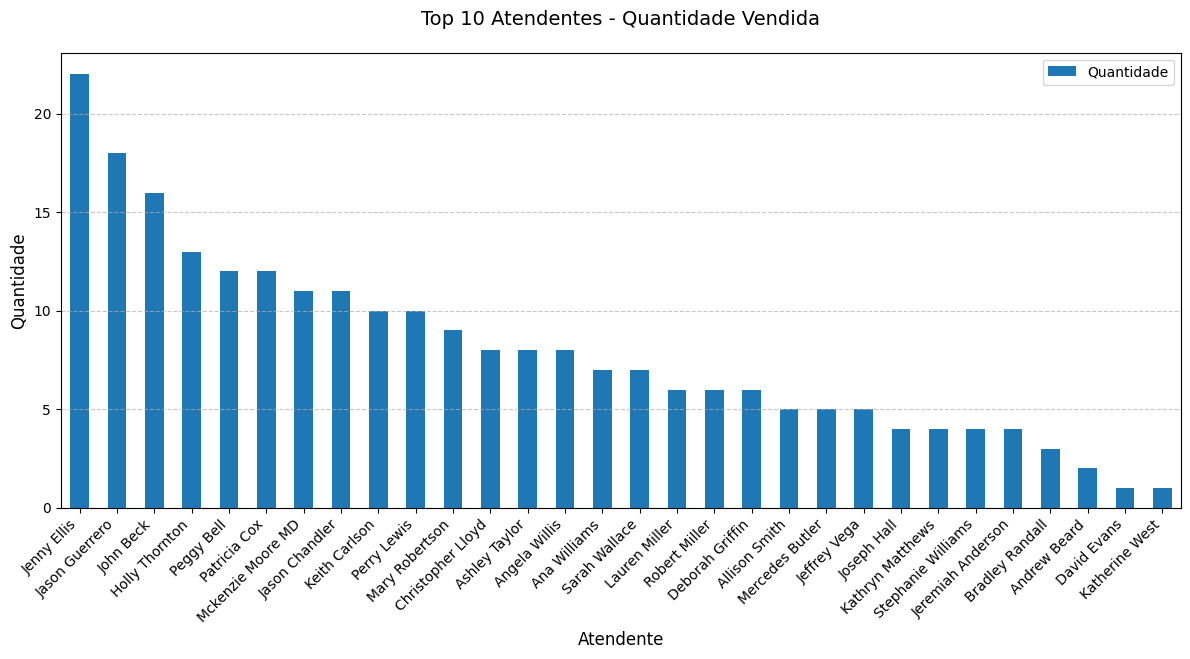

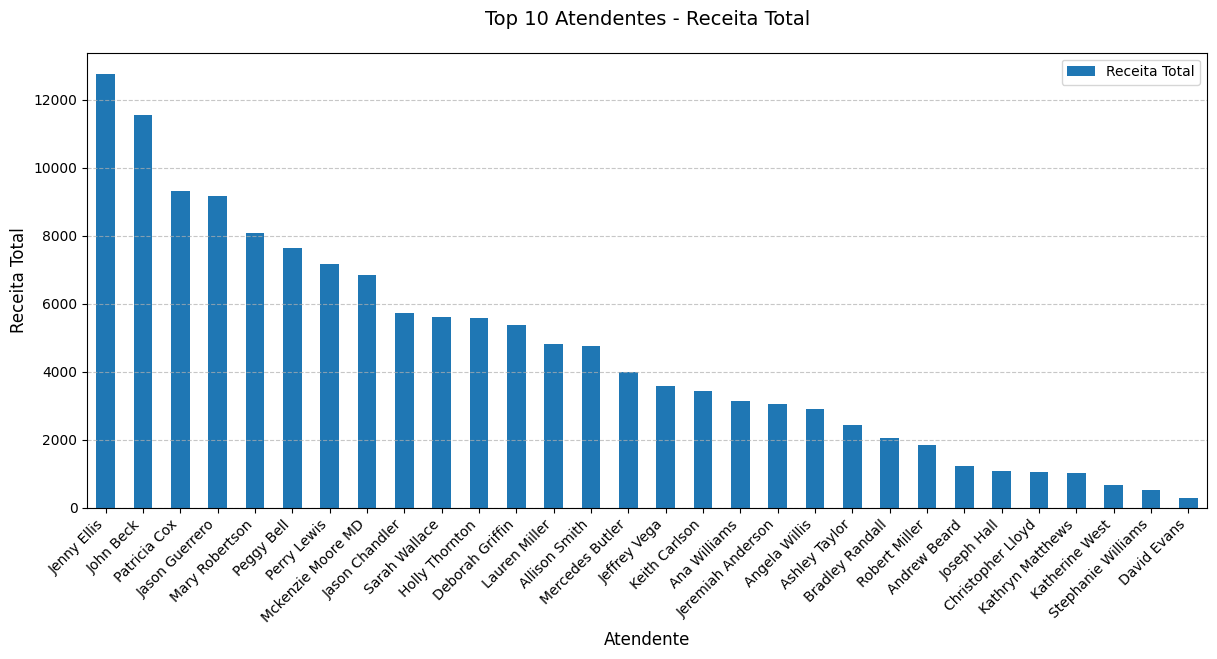

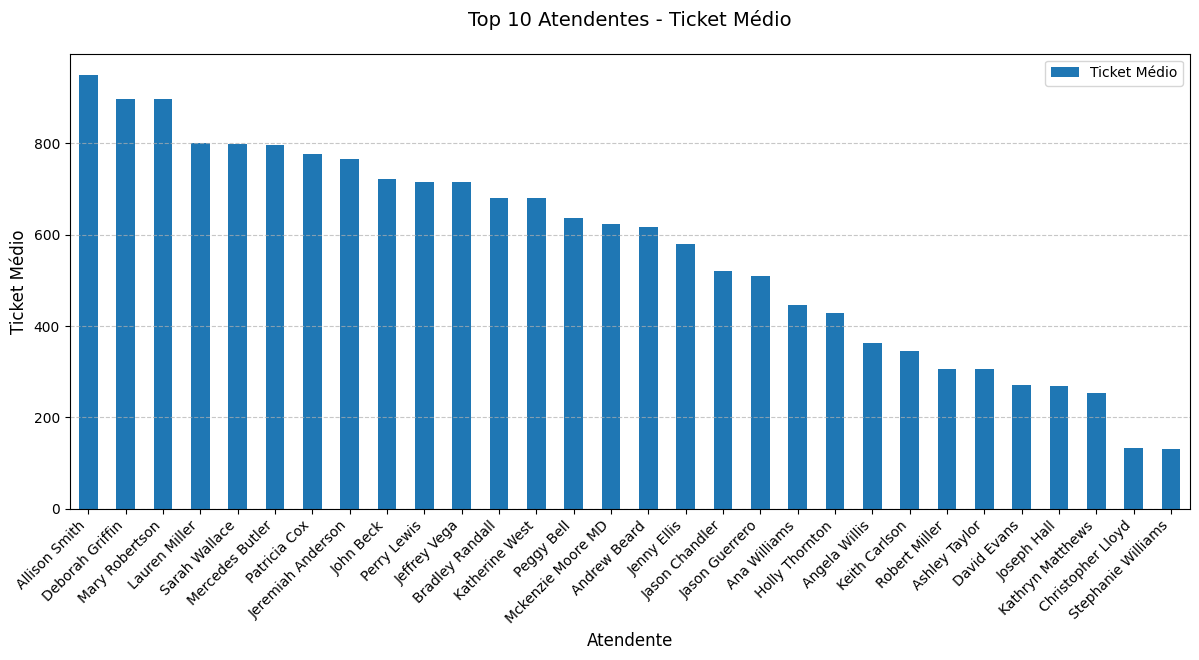

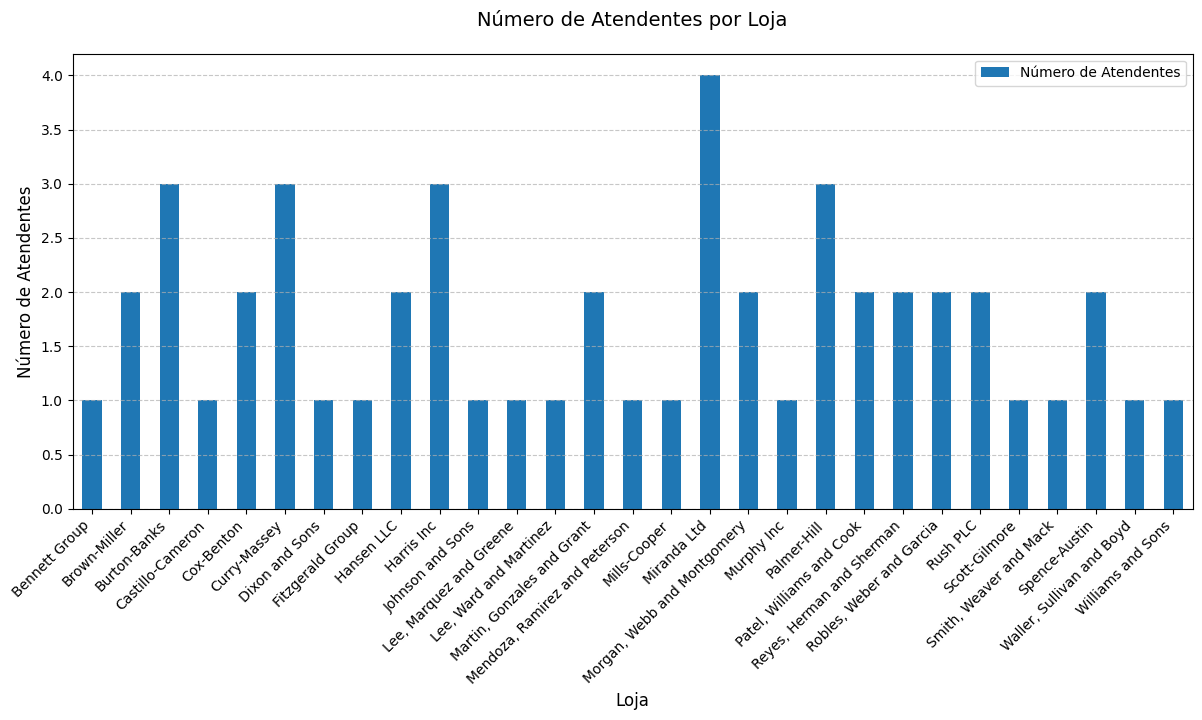

In [6]:
from utils.graficos import gerar_grafico

gerar_grafico(atendentes_mais_vendas, "Top 10 Atendentes - Quantidade Vendida", "Atendente", "Quantidade", "top10_atendentes_vendas")
gerar_grafico(atendentes_mais_receita, "Top 10 Atendentes - Receita Total", "Atendente", "Receita Total", "top10_atendentes_receita")
gerar_grafico(df_ticket_medio, "Top 10 Atendentes - Ticket Médio", "Atendente", "Ticket Médio", "top10_ticket_medio")
gerar_grafico(atendentes_por_loja, "Número de Atendentes por Loja", "Loja", "Número de Atendentes", "atendentes_por_loja")


In [7]:
import pandas
from utils.funcoes import guardar_analise_csv, merge_tabelas
from utils.logger_utils import get_logger
from classes.classanaliseatendentes import AnaliseAtendentes


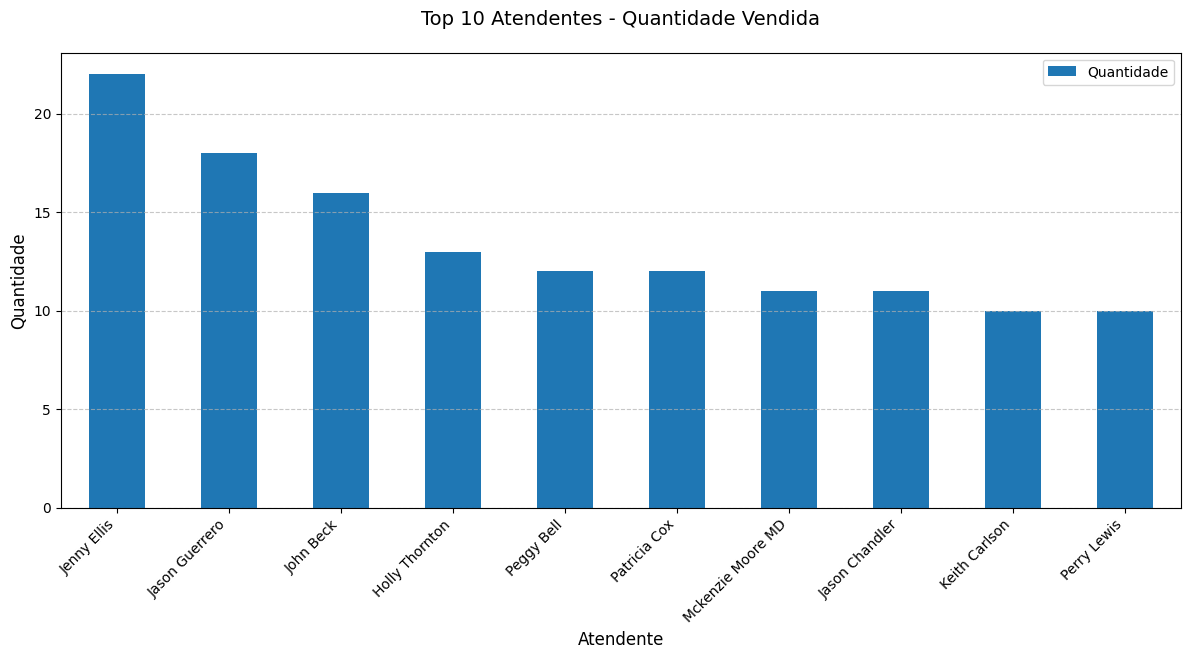

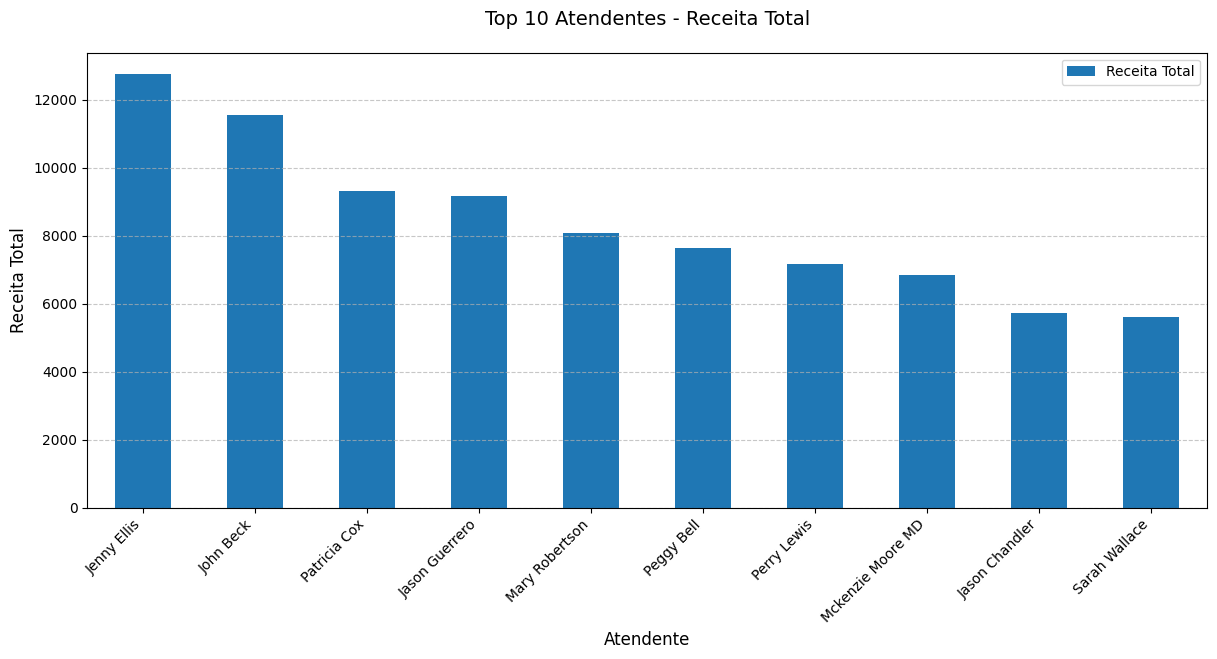

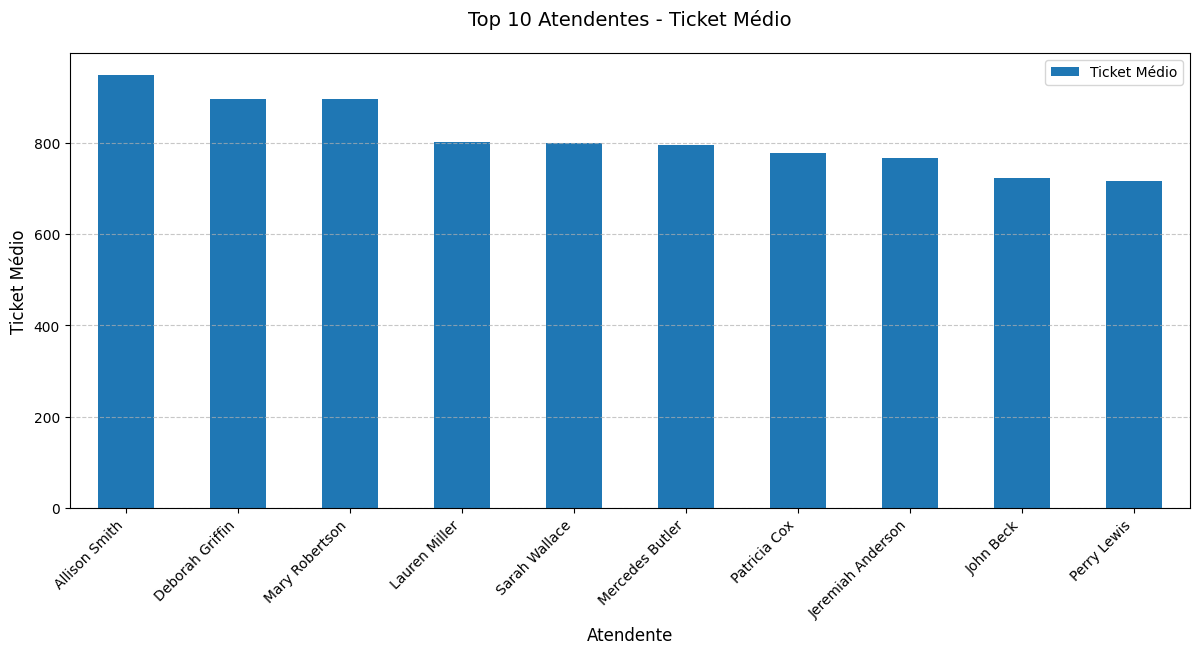

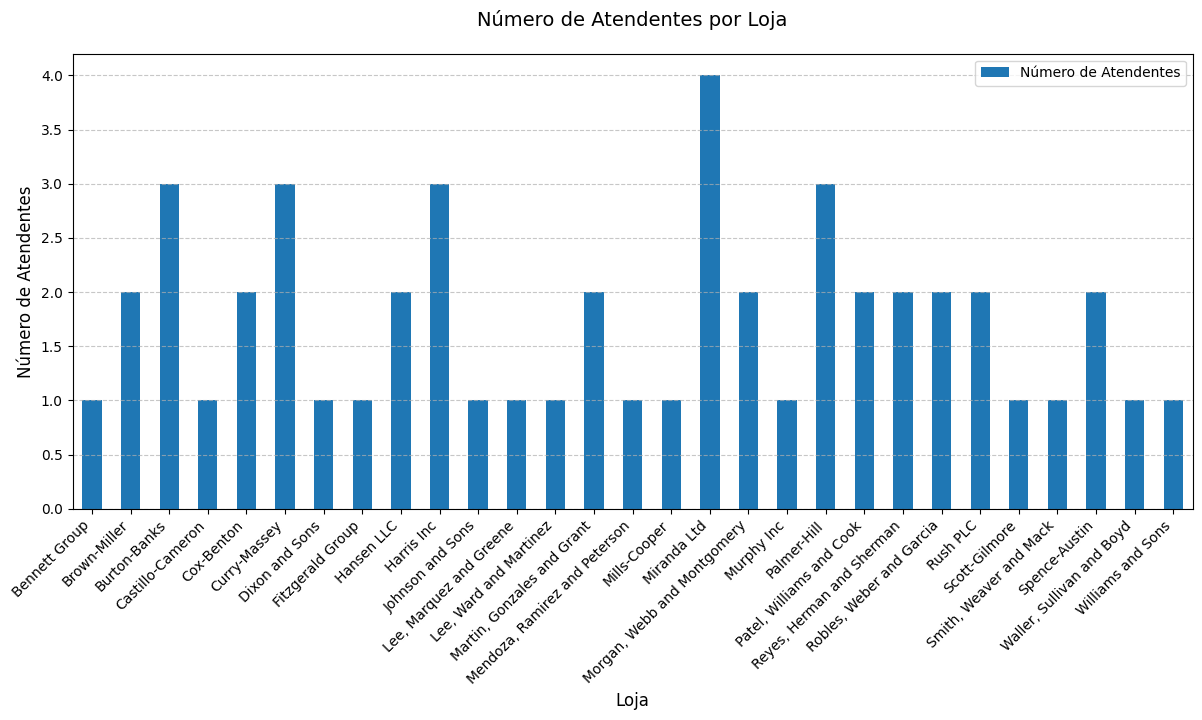

In [11]:

analise_atendentes = AnaliseAtendentes(db_manager)

atendentes_mais_vendas=analise_atendentes.atendentes_mais_venderam()
gerar_grafico(atendentes_mais_vendas, "Top 10 Atendentes - Quantidade Vendida", "Atendente", "Quantidade", "top10_atendentes_vendas")

atendentes_mais_receita=analise_atendentes.atendentes_mais_faturaram()
gerar_grafico(atendentes_mais_receita, "Top 10 Atendentes - Receita Total", "Atendente", "Receita Total", "top10_atendentes_receita")
        
df_ticket_medio=analise_atendentes.atendentes_ticket_medio_venda()
gerar_grafico(df_ticket_medio, "Top 10 Atendentes - Ticket Médio", "Atendente", "Ticket Médio", "top10_ticket_medio")
  